<a href="https://colab.research.google.com/github/aygunthebard/exc/blob/main/FIZ228_20231_MT1_OnurAyg%C3%BCn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("/content/FIZ228_20232_MT1_data.csv", header=None)


In [7]:
dataset.columns = ["t","y"]

In [8]:
print (dataset)

             t         y
0     0.000000 -0.631523
1     0.033445 -0.447049
2     0.066890 -0.331072
3     0.100334 -0.114149
4     0.133779 -0.168711
..         ...       ...
295   9.866221 -1.248320
296   9.899666 -0.943883
297   9.933110 -1.443523
298   9.966555 -1.640351
299  10.000000 -1.792804

[300 rows x 2 columns]


In [33]:
time = np.linspace(0,10,300)

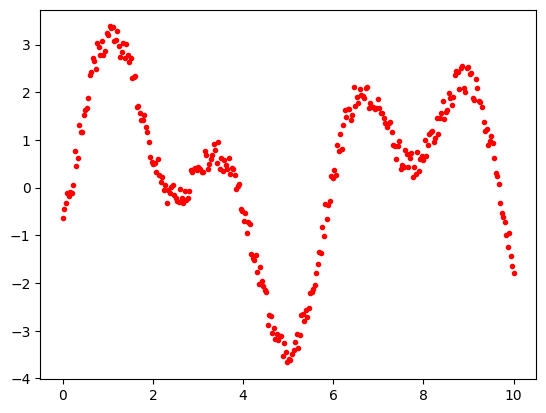

In [34]:
plt.plot(dataset['t'],dataset['y'],"r.")
plt.show()

y = A_1.sin(w_1.t + fi_1) + A_2.sin(w_2.t + fi_2)

In [35]:
a_max = dataset['y'].max()
a_min = dataset['y'].min()

In [102]:
#Maximum and minimum amplitudes#
a_max, a_min

(3.381167027541899, -3.666516600745043)

In [128]:
a_mean = (a_max+a_min)/2

In [77]:
no_max = (dataset[dataset["y"]== a_max].index.values)
no_max

array([31])

In [95]:
t_max =dataset.iloc[31,0]
t_max

1.0367892976588629

In [96]:
no_min = (dataset[dataset["y"]== a_min].index.values)
no_min

array([149])

In [97]:
t_min = dataset.iloc[149,0]
t_min

4.983277591973244

In [99]:
period = (t_min - t_max)*2
period

7.892976588628763

In [100]:
freq = 1/period

In [103]:
#Frequancy#
freq

0.1266949152542373

In [111]:
mean_y = dataset['y'].mean()
mean_y

0.4647061873513788

In [122]:
ds_n = dataset.iloc[(dataset['y']- mean_y).abs().argsort()[:2]]
ds_n

,t,y
108,3.612040,0.467185
9,0.301003,0.460008


In [298]:
#Phase#
phase = (((0.301003)/period)*(np.pi))*2
phase

0.23961272477884582

In [304]:
def wave_func(A,w,tt,p):
    yy = (np.sin(np.deg2rad((w*tt)+np.rad2deg(p)))) * A
    return yy

In [305]:
est = wave_func(a_mean,freq,dataset['t'],phase)

In [306]:
est

0     -0.033860
1     -0.033871
2     -0.033881
3     -0.033891
4     -0.033901
         ...   
295   -0.036876
296   -0.036886
297   -0.036896
298   -0.036907
299   -0.036917
Name: t, Length: 300, dtype: float64

In [307]:
dataset.loc[:,'e']=est

In [308]:
dataset

,t,y,e
0,0.000000,-0.631523,-0.03386
1,0.033445,-0.447049,-0.033871
2,0.066890,-0.331072,-0.033881
3,0.100334,-0.114149,-0.033891
4,0.133779,-0.168711,-0.033901
...,...,...,...
295,9.866221,-1.248320,-0.036876
296,9.899666,-0.943883,-0.036886
297,9.933110,-1.443523,-0.036896
298,9.966555,-1.640351,-0.036907


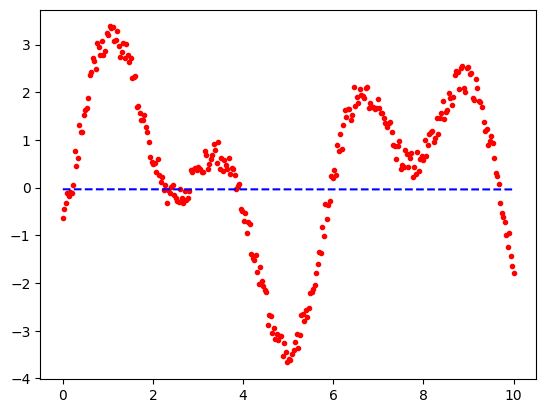

In [309]:
plt.plot(dataset['t'],dataset['y'],"r.")
plt.plot(dataset['t'],dataset['e'],"b--")
plt.show()

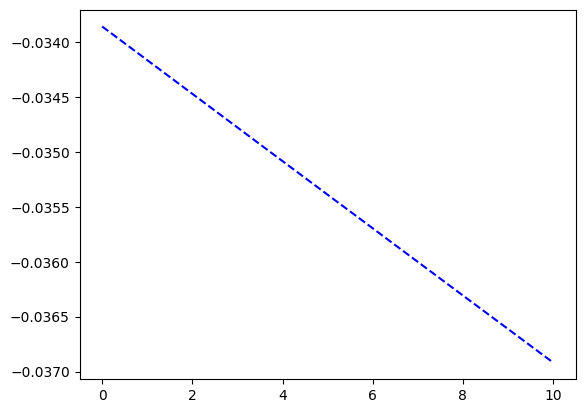

In [310]:
plt.plot(time,dataset['e'],"b--")
plt.show()